<a href="https://colab.research.google.com/github/huynhspm/Machine_Learning/blob/main/Softmax%20Regression/Softmax_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
# import lib
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse 
from sklearn.linear_model import LogisticRegression 

np.random.seed(4)

In [48]:
def convert_labels(y: np, C: int):
    """
    convert 1d label to a matrix label: each column of this 
    matrix coresponding to 1 element in y. In i-th column of Y, 
    only one non-zeros element located in the y[i]-th position, 
    and = 1 ex: y = [0, 2, 1, 0], and 3 classes then return

            [[1, 0, 0, 1],
             [0, 0, 1, 0],
             [0, 1, 0, 0]]
    """
    Y = sparse.coo_matrix((np.ones_like(y), 
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

In [49]:
# function to plot data points
def visualize_data(x, y):
    x0 = x[:, y == 0]
    x1 = x[:, y == 1]
    x2 = x[:, y == 2]

    plt.plot(x0[0, :], x0[1, :], 'bs', markersize = 5)
    plt.plot(x1[0, :], x1[1, :], 'g^', markersize = 5)
    plt.plot(x2[0, :], x2[1, :], 'ro', markersize = 5)

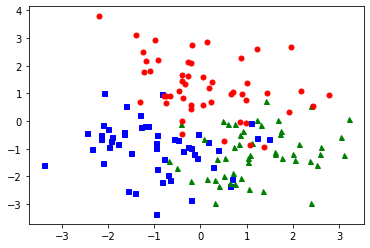

In [50]:
N = 50  # number of training sample
C = 3   # number of classes 

means = [[-1, -1], [1, -1], [0, 1]]
cov = [[1, 0], [0, 1]]

x0 = np.random.multivariate_normal(means[0], cov, N)
x1 = np.random.multivariate_normal(means[1], cov, N)
x2 = np.random.multivariate_normal(means[2], cov, N)
x = np.concatenate((x0, x1, x2), axis = 0).T    # all data
y = np.array([0]*N + [1]*N + [2]*N)             # labels 

visualize_data(x, y) # plot data


In [51]:
def softmax(Z):
    """
    Compute softmax values for each sets of scores in V.
    each column of V is a set of score.    
    """
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis = 0)
    return A

def softmax_stable(Z):
    """
    Compute softmax values for each sets of scores in V.
    each column of V is a set of score.    
    """
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
    A = e_Z / e_Z.sum(axis = 0)
    return A

def loss(X, Y, W):
    A = softmax(W.T.dot(X))
    return -np.sum(Y*np.log(A))

def predict(W, X):
    """
    predict output of each columns of X
    Class of each x_i is determined by location of max probability
    Note that class are indexed by [0, 1, 2, ...., C-1]
    """
    A = softmax_stable(W.T.dot(X))
    return np.argmax(A, axis = 0)

# function to calculate gradient
def grad(X, Y, W):
    A = softmax((W.T.dot(X)))
    E = A - Y
    return X.dot(E.T)

# check grad
def numerical_grad(X, Y, W, cost):
    eps = 1e-6
    g = np.zeros_like(W)
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            W_p = W.copy()
            W_n = W.copy()
            W_p[i, j] += eps 
            W_n[i, j] -= eps
            g[i,j] = (cost(X, Y, W_p) - cost(X, Y, W_n))/(2*eps)
    return g 

In [52]:
# Add a column-bias (full 1) to x
X = np.concatenate((np.ones((1, 3*N)), x), axis = 0)
print(X.shape)

d = X.shape[0]

# coefficient for learning rate
eta = .05 

# initial value of parameter 
W_init = np.random.randn(d, C)

(3, 150)


In [53]:
# function to train model 
def softmax_regression(X, y, W_init, eta, tol = 1e-4, max_count = 200):
    W = [W_init]    
    Y = convert_labels(y, C)
    it = 0
    d = X.shape[0]
    N = X.shape[1]
    count = 0
    check_w_after = 20
    error = []

    while count < max_count:
        # mix data 
        mix_id = np.random.permutation(N)
        
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(C, 1)

            # predict 
            ai = softmax(np.dot(W[-1].T, xi))

            # calculate loss
            error.append(loss(X, Y, W[-1]))

            # gradient descent
            W_new = W[-1] + eta*xi.dot((yi - ai).T)
            count += 1

            # stopping criteria
            if count%check_w_after == 0:                
                if np.linalg.norm(W_new - W[-check_w_after]) < tol:
                    return W
            W.append(W_new)
    return W, error

W, error = softmax_regression(X, y, W_init, eta)

In [54]:
# function to plot boundary of three classes
def visualize_boundary(W):
    x1 = np.arange(-5, 5, 0.025)
    x2 = np.arange(-5, 5, 0.025)
    x1, x2 = np.meshgrid(x1, x2)
    
    xx1 = x1.ravel().reshape(x1.size, 1)
    xx2 = x2.ravel().reshape(x2.size, 1)
    
    x = np.concatenate((xx1, xx2), axis = 1).T
    X = np.concatenate((np.ones((1, x.shape[1])), x), axis = 0)
                       
    y = predict(W, X)

    y = y.reshape(x1.shape)
    plt.contourf(x1, x2, y, 200, cmap='jet', alpha = .1)

def display_result(W, x, y):
    visualize_data(x, y)
    visualize_boundary(W)

[[ 0.45436568 -0.33530436  0.4959946 ]
 [-0.18260412  1.65144     1.17541173]
 [ 0.68822599  0.58887211  2.76047054]]


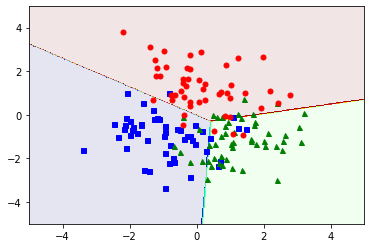

In [55]:
print(W[-1])
display_result(W[-1], x, y) # show result

Text(0, 0.5, 'rmseLoss')

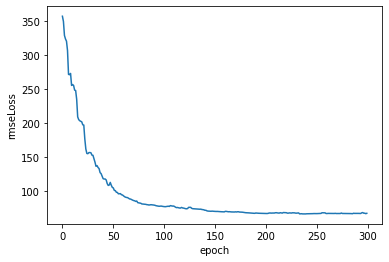

In [56]:
# plot loss function over iterators
plt.plot(error)
plt.xlabel('epoch')
plt.ylabel('rmseLoss')